In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import istft

# 설정
fs = 2000  # 샘플링 주파수 (Hz)
fft_win_time = 0.2  # 윈도우 길이 (초)
n_fft = int(fft_win_time * fs)  # FFT 윈도우 크기, 400 샘플
fft_overlap_time = int(fft_win_time / 2 * fs)  # 오버랩 크기, 200 샘플

# 데이터 생성 (예시)
def generate_sample_data(num_samples, sample_length, fs):
    """
    Generate synthetic sample data for testing.
    """
    t = np.linspace(0, sample_length / fs, sample_length, endpoint=False)
    data = np.sin(2 * np.pi * 130 * t)  # 130 Hz sine wave
    return np.tile(data, (num_samples, 1))

# 샘플 데이터 생성
data = generate_sample_data(1, 4000, fs)  # 1개의 샘플, 4000 샘플 길이

# STFT 계산
def compute_stft(data, fs, n_fft, overlap):
    """
    Compute STFT and return power spectrogram.
    """
    power_spectra = []
    for sample in data:
        f, t, Zxx = stft(sample, fs=fs, nperseg=n_fft, noverlap=overlap)
        power_spectrum = np.abs(Zxx) ** 2  # 올바르게 실수형으로 변환
        power_spectra.append((f, t, power_spectrum))
    return power_spectra

power_spectra = compute_stft(data, fs, n_fft, fft_overlap_time)

Data type of power_spectrum_db: float64


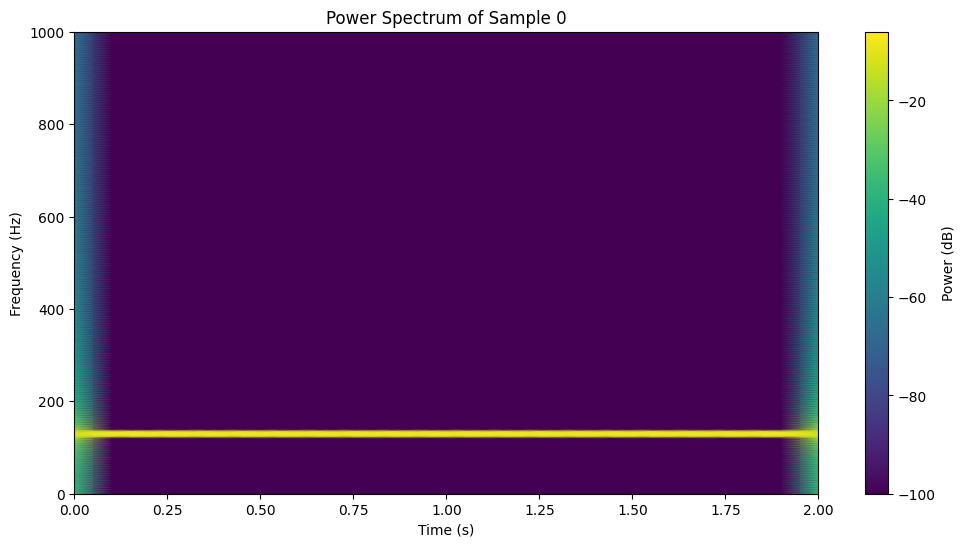

In [23]:
# 특정 샘플의 파워 스펙트럼 시각화 (예시로 첫 번째 샘플)
sample_index = 0
f, t, power_spectrum = power_spectra[sample_index]

# 파워 스펙트럼을 dB 단위로 변환
power_spectrum_db = 10 * np.log10(np.maximum(power_spectrum, 1e-10))  # +1e-10을 추가하여 로그의 무한대를 방지

# 데이터 타입 확인
print(f"Data type of power_spectrum_db: {power_spectrum_db.dtype}")

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 파워 스펙트럼 시각화
plt.pcolormesh(t, f, power_spectrum_db, shading='gouraud')
plt.colorbar(label='Power (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Power Spectrum of Sample {sample_index}')
plt.ylim(0, fs / 2)  # Nyquist 주파수까지 표시
plt.show()

In [24]:
# STFT 결과를 사용하여 ISTFT 계산
def compute_istft(power_spectra, fs, n_fft, overlap):
    """
    Compute ISTFT from power spectra and return time-domain signals.
    """
    time_signals = []
    for f, t, Zxx in power_spectra:
        _, recovered_signal = istft(Zxx, fs=fs, nperseg=n_fft, noverlap=overlap)
        time_signals.append(recovered_signal)
    return time_signals

time_signals = compute_istft(power_spectra, fs, n_fft, fft_overlap_time)

Original signal shape: (1, 4000)
Reconstructed signal shape: (1, 4000)


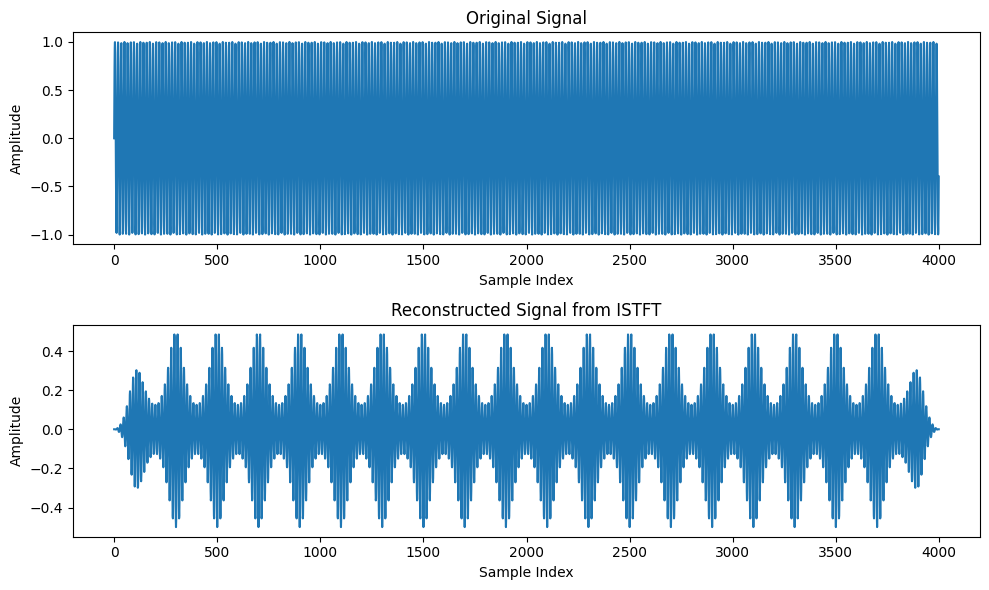

In [25]:
# 결과 확인
print(f"Original signal shape: {data.shape}")
print(f"Reconstructed signal shape: {np.array(time_signals).shape}")

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data[0])
plt.title('Original Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time_signals[0])
plt.title('Reconstructed Signal from ISTFT')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()